# **Importando a biblioteca**

In [ ]:
import pandas as pd

Vamos utilizar um conjunto de bases de dados pública da força aérea brasileira sobre ocorrências na aviação civil, para explorar as ferramentas da biblioteca Pandas.<br>
Dados disponíveis em: [Portal de dados abertos: CENIPA - Ocorrências Aeronáuticas na Aviação Civil Brasileira](https://dados.gov.br/dados/conjuntos-dados/ocorrencias-aeronauticas-da-aviacao-civil-brasileira)<br>


O modelo da dados abaixo representa a forma como as tabelas se relacionam.<br>

- ocorrencia.csv - Informações sobre as ocorrências.

- ocorrencia_tipo.csv - Informações sobre o tipo de ocorrência.

- aeronave.csv - Informações sobre as aeronaves envolvidas nas ocorrências.

- fator_contribuinte.csv - Informações sobre os fatores contribuinte das ocorrências que tiveram investigações finalizadas.

- recomendacao.csv - Informações sobre as recomendações de segurança geradas nas ocorrências.

Não vamos nos preocupar agora com modelagem de dados, vamos iniciar explorando apenas a tabela "aeronave" e lidar com as outras quando formos usar joins.<br>

![image.png](attachment:image.png)

In [ ]:
df = pd.read_csv('Bases de dados/ocorrencia.csv',
                 sep=';',
                 encoding='latin_1')
df.head()

,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,codigo_ocorrencia4,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,...,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista
0,83097,83097,83097,83097,83097,ACIDENTE,-2.352.777.777.777,-4.563.944.444.444,PARAIBUNA,SP,...,31/12/2023,18:00:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
1,83085,83085,83085,83085,83085,INCIDENTE,-9.868.333.333.333,-6.789.805.555.555,RIO BRANCO,AC,...,13/12/2023,11:33:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
2,83074,83074,83074,83074,83074,INCIDENTE,-1.962.444.444.444,-4.397.194.444.444,BELO HORIZONTE,MG,...,20/12/2023,20:00:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
3,83063,83063,83063,83063,83063,INCIDENTE,-1.587.111.111.111,-4.791.861.111.111,BRASÍLIA,DF,...,29/12/2023,21:20:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
4,83051,83051,83051,83051,83051,INCIDENTE,-4.871.388.888.888,-668.975,CARAUARI,AM,...,09/12/2023,18:30:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO


# **1. Exploração inicial e descrição dos dados**

Antes de uma análise semântica ou mais detalhada, devemos conhecer a estrutura, qualidade e a integridade dos dados que temos em mãos.<br>
Vamos começar vendo métodos sobre descrição dos dados e como fazer seleções e filtros. Isso nos dará uma bagagem para realizar tratamentos e a fazer uma análise exploratória semântica.

#### .info( )
Este método descreve as dimensões da base de dados, além de listar cada feature, o tipo de dado que armazena e valores não-nulos.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9821 entries, 0 to 9820
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   codigo_ocorrencia               9821 non-null   int64 
 1   codigo_ocorrencia1              9821 non-null   int64 
 2   codigo_ocorrencia2              9821 non-null   int64 
 3   codigo_ocorrencia3              9821 non-null   int64 
 4   codigo_ocorrencia4              9821 non-null   int64 
 5   ocorrencia_classificacao        9821 non-null   object
 6   ocorrencia_latitude             7240 non-null   object
 7   ocorrencia_longitude            7240 non-null   object
 8   ocorrencia_cidade               9821 non-null   object
 9   ocorrencia_uf                   9821 non-null   object
 10  ocorrencia_pais                 9821 non-null   object
 11  ocorrencia_aerodromo            9821 non-null   object
 12  ocorrencia_dia                  9821 non-null   

Nosso dataframe possui 9821 observações e 22 features.<br>
Temos 7 features armazenadas como numéricas e 15 do tipo texto.<br>
Há 7 features que apresentam *missing values* (valores nulos). Isso já demonstra que há alguns pontos que precisarão de tratamento, porém vamos ver outras formar de verificar missing values.<br>
As features referentes a dia e hora da ocorrência estão registradas como object. Vamos corrigir isto em uma próxima aula.

#### .dtypes( )<br>
Este método é mais básico e usado quando apenas para ver o tipo de cada feature, mas podemos usá-lo em conjunto a outros métodos e fazer filtros úteis.

In [ ]:
df.dtypes

codigo_ocorrencia                  int64
codigo_ocorrencia1                 int64
codigo_ocorrencia2                 int64
codigo_ocorrencia3                 int64
codigo_ocorrencia4                 int64
ocorrencia_classificacao          object
ocorrencia_latitude               object
ocorrencia_longitude              object
ocorrencia_cidade                 object
ocorrencia_uf                     object
ocorrencia_pais                   object
ocorrencia_aerodromo              object
ocorrencia_dia                    object
ocorrencia_hora                   object
investigacao_aeronave_liberada    object
investigacao_status               object
divulgacao_relatorio_numero       object
divulgacao_relatorio_publicado    object
divulgacao_dia_publicacao         object
total_recomendacoes                int64
total_aeronaves_envolvidas         int64
ocorrencia_saida_pista            object
dtype: object

In [ ]:
# Podemos criar um dataframe e, a partir dele fazermos máscaras para filtros
tipos = pd.DataFrame(df.dtypes, columns=['TIPO'])
tipos

,TIPO
codigo_ocorrencia,int64
codigo_ocorrencia1,int64
codigo_ocorrencia2,int64
codigo_ocorrencia3,int64
codigo_ocorrencia4,int64
ocorrencia_classificacao,object
ocorrencia_latitude,object
ocorrencia_longitude,object
ocorrencia_cidade,object
ocorrencia_uf,object


In [ ]:
# Vamos ver em detalhe como essa forma de filtrar funciona mais adiantes, mas a intenção neste momento é apresentar o que podemos fazer com o método dtypes.

# Este filtro seleciona apenas as features do tipo inteiro
tipos[tipos.TIPO == 'int64']

,TIPO
codigo_ocorrencia,int64
codigo_ocorrencia1,int64
codigo_ocorrencia2,int64
codigo_ocorrencia3,int64
codigo_ocorrencia4,int64
total_recomendacoes,int64
total_aeronaves_envolvidas,int64


#### .unique( ) e .nunique( )
Apresenta as ocorrências únicas de uma feature / quantidade de ocorrências únicas de uma feature.

In [ ]:
df.ocorrencia_uf.unique()

array(['SP', 'AC', 'MG', 'DF', 'AM', 'RJ', 'PE', 'TO', 'MA', 'PA', 'PR',
       'BA', 'SC', 'CE', 'RS', 'AL', 'GO', 'MT', 'ES', 'PB', 'SE', 'AP',
       'MS', 'PI', 'RO', '***', 'RR', 'RN'], dtype=object)

In [ ]:
df.ocorrencia_uf.nunique()

28

Aqui podemos perceber que há um registro "***". Quando formos verificar a integridade dos dados, iremos olhar com mais detalhes.

#### .value_counts( )<br>
Este método serve para contar quantas ocorrências há em cada categoria de uma feature, geralmente do tipo object. Porém pode ser usada para explorar o dataframe.

In [ ]:
df.ocorrencia_uf.value_counts()

SP     2386
RJ      873
MG      864
PR      769
RS      591
MT      492
GO      475
PA      468
BA      397
AM      390
SC      335
MS      276
DF      270
PE      225
CE      166
ES      127
MA      124
RR       94
AC       92
TO       91
RO       69
PI       69
PB       42
AL       42
RN       32
SE       29
AP       25
***       8
Name: ocorrencia_uf, dtype: int64

In [ ]:
tipos[tipos.TIPO == 'object'].index

Index(['ocorrencia_classificacao', 'ocorrencia_latitude',
       'ocorrencia_longitude', 'ocorrencia_cidade', 'ocorrencia_uf',
       'ocorrencia_pais', 'ocorrencia_aerodromo', 'ocorrencia_dia',
       'ocorrencia_hora', 'investigacao_aeronave_liberada',
       'investigacao_status', 'divulgacao_relatorio_numero',
       'divulgacao_relatorio_publicado', 'divulgacao_dia_publicacao',
       'ocorrencia_saida_pista'],
      dtype='object')

In [ ]:
tipos[tipos.TIPO == 'object'].index
lista = ['ocorrencia_classificacao', 'ocorrencia_aerodromo']

In [ ]:
pd.set_option('display.max_rows', None) # Para exibir todas as linhas que possam ficar ocultas

for coluna in df[lista].columns:
    print(df[coluna].value_counts())
    print('*********************************')

INCIDENTE          6162
ACIDENTE           2601
INCIDENTE GRAVE    1058
Name: ocorrencia_classificacao, dtype: int64
*********************************
***     3124
SBGR     341
SBKP     249
**NI     222
SBGL     202
SBBR     201
SBSP     199
SBMT     185
SBPA     176
SBBH     169
SBLO     162
SBSV     159
SBRF     149
SBRJ     143
SBEG     133
SBGO     131
SBCF     120
SBCT     108
SBJR     104
SBBE      98
SBFZ      93
SBJD      91
SBRP      86
SBBI      86
SBCY      81
SBFL      81
SBCG      72
SBUL      62
SBVT      58
SBBP      53
SBNF      53
SBPR      52
SBNV      50
SBSJ      49
SBME      44
SBMG      43
****      40
SBRB      37
SBSL      36
APUA      36
SDCO      35
SBSR      34
SBJV      32
SWFN      32
SDAM      32
SBTE      31
SBPJ      31
SBSN      29
SBMA      29
SBFI      27
SBCA      25
SBPV      24
SBMO      22
SDPW      22
SBJP      22
SBJC      21
SBJF      21
SBPS      21
SBBU      20
SDAI      18
SNPA      18
SBJU      18
SDTB      18
SBIL      18
SDVH      17
SBMK

O registro "***" aparece em mais de uma feature. Apesar de não ser um dado registrado, podemos considerar que foi uma informação não coletada ou não disponível no momento do registro dos dados, **portanto um missing value**.

# **2. Fazendo filtros e seleções em dataframes**

Em geral, podemos selecionar colunas de duas formas.

In [ ]:
# Quando não há espaços no nome da coluna, podemos selecionar dessa forma
df.codigo_ocorrencia.head(3)

0    83097
1    83085
2    83074
Name: codigo_ocorrencia, dtype: int64

In [ ]:
# Quando há espaços, vamos selcionar mais de uma coluna
df['codigo_ocorrencia'].head(3)

0    83097
1    83085
2    83074
Name: codigo_ocorrencia, dtype: int64

In [ ]:
df[['codigo_ocorrencia', 'codigo_ocorrencia1']].head(3)

,codigo_ocorrencia,codigo_ocorrencia1
0,83097,83097
1,83085,83085
2,83074,83074


### **Operadores de comparação**
A partir dos operadores de comparação do Python **(>, <, ==, !=, >=, <=)** podem ser criados filtros booleanos, conforme as condições determinadas.

In [ ]:
a, b = 10,20
a > b

False

As Series Pandas também comportam essas comparações.

In [ ]:
df['investigacao_status'].head() == 'ATIVA'

0    False
1    False
2    False
3    False
4    False
Name: investigacao_status, dtype: bool

In [ ]:
df['total_recomendacoes'].head() > 10

0    False
1    False
2    False
3    False
4    False
Name: total_recomendacoes, dtype: bool

A comparação percorre todas as ocorrências retornando True/False para cada posição.<br>
A condição pode ser usada como filtro.

In [ ]:
# É usual salvarmos a máscara em uma variável
mascara = df['investigacao_status'] == 'ATIVA'

# Aplica a máscara no dataframe e retorna apenas as linhas referentes a ATIVA na coluna investigacao_status
df[mascara].head()

,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,codigo_ocorrencia4,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,...,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista
67,82932,82932,82932,82932,82932,ACIDENTE,-300.625,-568.625,URUGUAIANA,RS,...,21/12/2023,21:10:00,SIM,ATIVA,A-162/CENIPA/2023,NÃO,NaN,0,1,NÃO
99,82900,82900,82900,82900,82900,ACIDENTE,-2.124.027.777.777,-4.831.388.888.888,JABOTICABAL,SP,...,23/12/2023,12:00:00,NÃO,ATIVA,A-164/CENIPA/2023,NÃO,NaN,0,1,NÃO
100,82899,82899,82899,82899,82899,ACIDENTE,-2.144.111.111.111,-4.511.333.333.333,CARMO DA CACHOEIRA,MG,...,26/12/2023,13:40:00,NÃO,ATIVA,A-165/CENIPA/2023,NÃO,NaN,0,1,NÃO
102,82897,82897,82897,82897,82897,ACIDENTE,-3.068.055.555.555,-54.76,DOM PEDRITO,RS,...,17/12/2023,21:35:00,SIM,ATIVA,A-161/CENIPA/2023,NÃO,NaN,0,1,NÃO
103,82896,82896,82896,82896,82896,ACIDENTE,-23.565,-4.606.638.888.888,BIRITIBA-MIRIM,SP,...,22/12/2023,18:00:00,NÃO,ATIVA,A-163/CENIPA/2023,NÃO,NaN,0,1,NÃO


Podemos aplicar mais de uma condição usando os operadores AND/E - OR/OU

In [ ]:
mascara_and = (df['ocorrencia_uf'] == 'MG') & (df['total_aeronaves_envolvidas'] <= 2)
df[mascara_and].head()

,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,codigo_ocorrencia4,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,...,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista
2,83074,83074,83074,83074,83074,INCIDENTE,-1.962.444.444.444,-4.397.194.444.444,BELO HORIZONTE,MG,...,20/12/2023,20:00:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
13,83028,83028,83028,83028,83028,INCIDENTE,-1.962.444.444.444,-4.397.194.444.444,CONFINS,MG,...,25/12/2023,08:00:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
15,83026,83026,83026,83026,83026,INCIDENTE,-1.889.611.111.111,-4.198.333.333.333,GOVERNADOR VALADARES,MG,...,23/12/2023,01:47:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
33,82986,82986,82986,82986,82986,INCIDENTE,-1.670.611.111.111,-4.382.194.444.444,MONTES CLAROS,MG,...,23/11/2023,00:35:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
51,82953,82953,82953,82953,82953,INCIDENTE,-1.888.361.111.111,-4.822.527.777.777,UBERLÂNDIA,MG,...,31/12/2023,22:30:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO


In [ ]:
mascara_ou = (df['ocorrencia_uf'] == 'AM') | (df['total_aeronaves_envolvidas'] == 2)
df[mascara_ou].head(20)

,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,codigo_ocorrencia4,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,...,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista
4,83051,83051,83051,83051,83051,INCIDENTE,-4.871.388.888.888,-668.975,CARAUARI,AM,...,09/12/2023,18:30:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
72,82927,82927,82927,82927,82927,INCIDENTE,-3.041.111.111.111,-6.005.055.555.555,MANAUS,AM,...,26/11/2023,03:01:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
118,82880,82880,82880,82880,82880,INCIDENTE,-3.041.111.111.111,-6.005.055.555.555,MANAUS,AM,...,25/10/2023,18:45:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
130,82867,82867,82867,82867,82867,INCIDENTE,-3.041.111.111.111,-6.005.055.555.555,MANAUS,AM,...,08/10/2023,02:00:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
358,82620,82620,82620,82620,82620,INCIDENTE,-3.041.111.111.111,-6.005.055.555.555,MANAUS,AM,...,06/08/2023,15:10:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
436,82534,82534,82534,82534,82534,INCIDENTE,-3.041.111.111.111,-6.005.055.555.555,MANAUS,AM,...,27/11/2023,18:07:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
494,82472,82472,82472,82472,82472,INCIDENTE,-3.041.111.111.111,-6.005.055.555.555,MANAUS,AM,...,13/11/2023,22:28:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
538,82424,82424,82424,82424,82424,INCIDENTE,-3.041.111.111.111,-6.005.055.555.555,MANAUS,AM,...,26/10/2023,21:02:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
615,82339,82339,82339,82339,82339,INCIDENTE,-3.041.111.111.111,-6.005.055.555.555,MANAUS,AM,...,26/10/2023,21:02:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
625,82325,82325,82325,82325,82325,ACIDENTE,-3.041.111.111.111,-6.005.055.555.555,MANAUS,AM,...,03/11/2023,20:10:00,NÃO,ATIVA,A-140/CENIPA/2023,NÃO,NaN,0,1,NÃO


Podemos combinar quantas condições forem necessárias na máscara


In [ ]:
mascara_mista = ((df['ocorrencia_uf'] == 'MG') | (df['ocorrencia_uf'] == 'AM')) \
                & (df['total_aeronaves_envolvidas'] <= 2)
df[mascara_mista].head(20)

,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,codigo_ocorrencia4,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,...,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista
2,83074,83074,83074,83074,83074,INCIDENTE,-1.962.444.444.444,-4.397.194.444.444,BELO HORIZONTE,MG,...,20/12/2023,20:00:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
4,83051,83051,83051,83051,83051,INCIDENTE,-4.871.388.888.888,-668.975,CARAUARI,AM,...,09/12/2023,18:30:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
13,83028,83028,83028,83028,83028,INCIDENTE,-1.962.444.444.444,-4.397.194.444.444,CONFINS,MG,...,25/12/2023,08:00:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
15,83026,83026,83026,83026,83026,INCIDENTE,-1.889.611.111.111,-4.198.333.333.333,GOVERNADOR VALADARES,MG,...,23/12/2023,01:47:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
33,82986,82986,82986,82986,82986,INCIDENTE,-1.670.611.111.111,-4.382.194.444.444,MONTES CLAROS,MG,...,23/11/2023,00:35:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
51,82953,82953,82953,82953,82953,INCIDENTE,-1.888.361.111.111,-4.822.527.777.777,UBERLÂNDIA,MG,...,31/12/2023,22:30:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
56,82946,82946,82946,82946,82946,INCIDENTE,-1.888.361.111.111,-4.822.527.777.777,UBERLÂNDIA,MG,...,27/12/2023,22:27:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
72,82927,82927,82927,82927,82927,INCIDENTE,-3.041.111.111.111,-6.005.055.555.555,MANAUS,AM,...,26/11/2023,03:01:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
82,82917,82917,82917,82917,82917,INCIDENTE,-1.962.444.444.444,-4.397.194.444.444,CONFINS,MG,...,12/11/2023,14:20:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
100,82899,82899,82899,82899,82899,ACIDENTE,-2.144.111.111.111,-4.511.333.333.333,CARMO DA CACHOEIRA,MG,...,26/12/2023,13:40:00,NÃO,ATIVA,A-165/CENIPA/2023,NÃO,NaN,0,1,NÃO


### [.iloc[ ]](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html) e [.loc[ ]](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html)
Vimos a aplicação desses dois métodos com Series. Com DataFrames, a aplicação segue o mesmo raciocício, com a possibilidade de posicionar linhas e colunas.<br>
- .iloc[ ] permite selecionar uma posição ou um intervalo de posições, de linhas e/ou colunas, com base em seus índices.

- .loc[ ] permite fazer seleções de linhas e colunas pelas labels.

#### **iloc**

##### Apenas linhas

In [ ]:
# Acessa a linha de índice 3 (o acesso a apenas uma linha retorna, como padrão, um formato de Series em que cada coluna se torna o index da Series)
df.iloc[3]

codigo_ocorrencia                              83063
codigo_ocorrencia1                             83063
codigo_ocorrencia2                             83063
codigo_ocorrencia3                             83063
codigo_ocorrencia4                             83063
ocorrencia_classificacao                   INCIDENTE
ocorrencia_latitude               -1.587.111.111.111
ocorrencia_longitude              -4.791.861.111.111
ocorrencia_cidade                           BRASÍLIA
ocorrencia_uf                                     DF
ocorrencia_pais                               BRASIL
ocorrencia_aerodromo                            SBBR
ocorrencia_dia                            29/12/2023
ocorrencia_hora                             21:20:00
investigacao_aeronave_liberada                   SIM
investigacao_status                       FINALIZADA
divulgacao_relatorio_numero                      ***
divulgacao_relatorio_publicado                   NÃO
divulgacao_dia_publicacao                     

In [ ]:
# Acessa um intervalo de linhas
df.iloc[3:9]

,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,codigo_ocorrencia4,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,...,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista
3,83063,83063,83063,83063,83063,INCIDENTE,-1.587.111.111.111,-4.791.861.111.111,BRASÍLIA,DF,...,29/12/2023,21:20:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
4,83051,83051,83051,83051,83051,INCIDENTE,-4.871.388.888.888,-668.975,CARAUARI,AM,...,09/12/2023,18:30:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
5,83044,83044,83044,83044,83044,INCIDENTE,-2.300.694.444.444,-4.713.444.444.444,CAMPINAS,SP,...,29/12/2023,23:50:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
6,83036,83036,83036,83036,83036,INCIDENTE,-2.292.083.333.333,-4.207.138.888.888,CABO FRIO,RJ,...,30/12/2023,21:47:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
7,83035,83035,83035,83035,83035,INCIDENTE,-3.854.722.222.222,-3.242.833.333.333,FERNANDO DE NORONHA,PE,...,30/12/2023,21:00:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
8,83033,83033,83033,83033,83033,INCIDENTE,-22.175,-5.142.444.444.444,PRESIDENTE PRUDENTE,SP,...,28/12/2023,10:34:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO


In [ ]:
# Acessa linhas distintas
# Quando selecionamos mais de uma posição distinta, deve ser argumentado dentro de outro par de colchetes
df.iloc[[3,9]]

,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,codigo_ocorrencia4,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,...,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista
3,83063,83063,83063,83063,83063,INCIDENTE,-1.587.111.111.111,-4.791.861.111.111,BRASÍLIA,DF,...,29/12/2023,21:20:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
9,83032,83032,83032,83032,83032,INCIDENTE,-10.29,-4.835.777.777.777,PALMAS,TO,...,29/12/2023,05:07:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO


##### Linhas e colunas

In [ ]:
# Acessa um coluna específica (por padrão, o acesso a apenas uma coluna retorna um formato de Series)
df.iloc[3:9, 9]

3    DF
4    AM
5    SP
6    RJ
7    PE
8    SP
Name: ocorrencia_uf, dtype: object

In [ ]:
pd.DataFrame(df.iloc[3:9, 9])

,ocorrencia_uf
3,DF
4,AM
5,SP
6,RJ
7,PE
8,SP


In [ ]:
# Acessa um intervalo de colunas
# Quando não se declara um índice após o ":", o método retorna do primeiro valor de índice até o último
df.iloc[7:12, 15:]

,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista
7,FINALIZADA,***,NÃO,NaN,0,1,NÃO
8,FINALIZADA,***,NÃO,NaN,0,1,NÃO
9,FINALIZADA,***,NÃO,NaN,0,1,NÃO
10,FINALIZADA,***,NÃO,NaN,0,1,NÃO
11,FINALIZADA,***,NÃO,NaN,0,1,NÃO


In [ ]:
# Acessa colunas específicas
# O índice "-1" retorna a última linha ou coluna
df.iloc[[3,9], [4,-1]]

,codigo_ocorrencia4,ocorrencia_saida_pista
3,83063,NÃO
9,83032,NÃO


#### **loc**

O índice de linhas do nosso dataframe está identificado por números (padrão), mas é comum termos um índice nomeado.<br>
Como o método loc seleciona pelo nome do índice e coluna, vamos criar nomes para o nosso índice.

In [ ]:
# Cria uma coluna com nomes para o índice
df['nome_indice'] = df['codigo_ocorrencia'].astype(str) + '_' + df['ocorrencia_uf']

# Cria uma nova varável para armazenar o dataframe com o índice nomeado
df_loc = df.set_index('nome_indice')

# Remove o nome da coluna do índice, para melhorar a visualização
df_loc.index.name = None

df_loc.head(10)

,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,codigo_ocorrencia4,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,...,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista
83097_SP,83097,83097,83097,83097,83097,ACIDENTE,-2.352.777.777.777,-4.563.944.444.444,PARAIBUNA,SP,...,31/12/2023,18:00:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
83085_AC,83085,83085,83085,83085,83085,INCIDENTE,-9.868.333.333.333,-6.789.805.555.555,RIO BRANCO,AC,...,13/12/2023,11:33:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
83074_MG,83074,83074,83074,83074,83074,INCIDENTE,-1.962.444.444.444,-4.397.194.444.444,BELO HORIZONTE,MG,...,20/12/2023,20:00:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
83063_DF,83063,83063,83063,83063,83063,INCIDENTE,-1.587.111.111.111,-4.791.861.111.111,BRASÍLIA,DF,...,29/12/2023,21:20:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
83051_AM,83051,83051,83051,83051,83051,INCIDENTE,-4.871.388.888.888,-668.975,CARAUARI,AM,...,09/12/2023,18:30:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
83044_SP,83044,83044,83044,83044,83044,INCIDENTE,-2.300.694.444.444,-4.713.444.444.444,CAMPINAS,SP,...,29/12/2023,23:50:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
83036_RJ,83036,83036,83036,83036,83036,INCIDENTE,-2.292.083.333.333,-4.207.138.888.888,CABO FRIO,RJ,...,30/12/2023,21:47:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
83035_PE,83035,83035,83035,83035,83035,INCIDENTE,-3.854.722.222.222,-3.242.833.333.333,FERNANDO DE NORONHA,PE,...,30/12/2023,21:00:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
83033_SP,83033,83033,83033,83033,83033,INCIDENTE,-22.175,-5.142.444.444.444,PRESIDENTE PRUDENTE,SP,...,28/12/2023,10:34:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
83032_TO,83032,83032,83032,83032,83032,INCIDENTE,-10.29,-4.835.777.777.777,PALMAS,TO,...,29/12/2023,05:07:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO


##### Apenas linhas

In [ ]:
# Acessa uma posição
df_loc.loc['83085_AC']

codigo_ocorrencia                              83085
codigo_ocorrencia1                             83085
codigo_ocorrencia2                             83085
codigo_ocorrencia3                             83085
codigo_ocorrencia4                             83085
ocorrencia_classificacao                   INCIDENTE
ocorrencia_latitude               -9.868.333.333.333
ocorrencia_longitude              -6.789.805.555.555
ocorrencia_cidade                         RIO BRANCO
ocorrencia_uf                                     AC
ocorrencia_pais                               BRASIL
ocorrencia_aerodromo                            SBRB
ocorrencia_dia                            13/12/2023
ocorrencia_hora                             11:33:00
investigacao_aeronave_liberada                   SIM
investigacao_status                       FINALIZADA
divulgacao_relatorio_numero                      ***
divulgacao_relatorio_publicado                   NÃO
divulgacao_dia_publicacao                     

In [ ]:
# Acessa um intervalo de linhas
df_loc.loc['83036_RJ':'83032_TO']

,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,codigo_ocorrencia4,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,...,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista
83036_RJ,83036,83036,83036,83036,83036,INCIDENTE,-2.292.083.333.333,-4.207.138.888.888,CABO FRIO,RJ,...,30/12/2023,21:47:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
83035_PE,83035,83035,83035,83035,83035,INCIDENTE,-3.854.722.222.222,-3.242.833.333.333,FERNANDO DE NORONHA,PE,...,30/12/2023,21:00:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
83033_SP,83033,83033,83033,83033,83033,INCIDENTE,-22.175,-5.142.444.444.444,PRESIDENTE PRUDENTE,SP,...,28/12/2023,10:34:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
83032_TO,83032,83032,83032,83032,83032,INCIDENTE,-10.29,-4.835.777.777.777,PALMAS,TO,...,29/12/2023,05:07:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO


In [ ]:
# Acessa linhas específicas
df_loc.loc[['83036_RJ','83032_TO']]

,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,codigo_ocorrencia4,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,...,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista
83036_RJ,83036,83036,83036,83036,83036,INCIDENTE,-2.292.083.333.333,-4.207.138.888.888,CABO FRIO,RJ,...,30/12/2023,21:47:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
83032_TO,83032,83032,83032,83032,83032,INCIDENTE,-10.29,-4.835.777.777.777,PALMAS,TO,...,29/12/2023,05:07:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO


##### Linhas e colunas

In [ ]:
# Acessa uma coluna
df_loc.loc['83036_RJ':'83032_TO', 'ocorrencia_cidade']

83036_RJ              CABO FRIO
83035_PE    FERNANDO DE NORONHA
83033_SP    PRESIDENTE PRUDENTE
83032_TO                 PALMAS
Name: ocorrencia_cidade, dtype: object

In [ ]:
# Acessa um intervalo de colunas
df_loc.loc['83036_RJ':'83032_TO', 'ocorrencia_cidade':'ocorrencia_dia']

,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia
83036_RJ,CABO FRIO,RJ,BRASIL,SBCB,30/12/2023
83035_PE,FERNANDO DE NORONHA,PE,BRASIL,SBFN,30/12/2023
83033_SP,PRESIDENTE PRUDENTE,SP,BRASIL,SBDN,28/12/2023
83032_TO,PALMAS,TO,BRASIL,SBPJ,29/12/2023


In [ ]:
# Acessa colunas específicas
df_loc.loc['83036_RJ':'83032_TO', ['ocorrencia_cidade','ocorrencia_dia']]

,ocorrencia_cidade,ocorrencia_dia
83036_RJ,CABO FRIO,30/12/2023
83035_PE,FERNANDO DE NORONHA,30/12/2023
83033_SP,PRESIDENTE PRUDENTE,28/12/2023
83032_TO,PALMAS,29/12/2023


### [.query](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.query.html)

O método query permite escrever uma consulta, semelhante à linguagem SQL, utilizando operadores lógicos.

In [ ]:
df.query('total_aeronaves_envolvidas >= 2').head()

,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,codigo_ocorrencia4,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,...,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista,nome_indice
937,81978,81978,81978,81978,81978,INCIDENTE,-5.530.555.555.555,-4.745.833.333.333,IMPERATRIZ,MA,...,14:20:00,SIM,FINALIZADA,***,NÃO,NaN,0,2,NÃO,81978_MA
1015,81887,81887,81887,81887,81887,INCIDENTE GRAVE,-22.81,-4.325.055.555.555,RIO DE JANEIRO,RJ,...,10:47:00,SIM,ATIVA,IG-116/CENIPA/2023,NÃO,NaN,0,2,NÃO,81887_RJ
1132,81672,81672,81672,81672,81672,INCIDENTE,-2.271.055.555.555,-4.761.944.444.444,PIRACICABA,SP,...,17:35:00,SIM,ATIVA,A DEFINIR,NÃO,NaN,0,2,NÃO,81672_SP
1185,81499,81499,81499,81499,81499,INCIDENTE,***,***,SÃO JOSÉ,SC,...,18:50:00,SIM,FINALIZADA,***,NÃO,NaN,0,2,NÃO,81499_SC
1202,81478,81478,81478,81478,81478,INCIDENTE,-155.625,-5.433.055.555.555,PRIMAVERA DO LESTE,MT,...,12:45:00,SIM,FINALIZADA,***,NÃO,NaN,0,2,NÃO,81478_MT


In [ ]:
# Ao filtrar elementos categóricos deve-se usar aspas nos nomes dos elementos, além das aspas da consulta.
df.query('ocorrencia_uf == "CE"').head()

,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,codigo_ocorrencia4,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,...,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista,nome_indice
25,82996,82996,82996,82996,82996,INCIDENTE,-3.775.833.333.333,-3.853.222.222.222,FORTALEZA,CE,...,01:15:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO,82996_CE
69,82930,82930,82930,82930,82930,INCIDENTE,-3.775.833.333.333,-3.853.222.222.222,FORTALEZA,CE,...,16:35:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO,82930_CE
75,82924,82924,82924,82924,82924,INCIDENTE,-3.775.833.333.333,-3.853.222.222.222,FORTALEZA,CE,...,18:40:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO,82924_CE
154,82843,82843,82843,82843,82843,INCIDENTE,-3.775.833.333.333,-3.853.222.222.222,FORTALEZA,CE,...,15:20:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO,82843_CE
318,82662,82662,82662,82662,82662,INCIDENTE,-3.775.833.333.333,-3.853.222.222.222,FORTALEZA,CE,...,00:04:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO,82662_CE


In [ ]:
# Usando operador AND/&
df.query('ocorrencia_uf == "CE" and total_aeronaves_envolvidas == 1').head()

,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,codigo_ocorrencia4,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,...,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista,nome_indice
25,82996,82996,82996,82996,82996,INCIDENTE,-3.775.833.333.333,-3.853.222.222.222,FORTALEZA,CE,...,01:15:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO,82996_CE
69,82930,82930,82930,82930,82930,INCIDENTE,-3.775.833.333.333,-3.853.222.222.222,FORTALEZA,CE,...,16:35:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO,82930_CE
75,82924,82924,82924,82924,82924,INCIDENTE,-3.775.833.333.333,-3.853.222.222.222,FORTALEZA,CE,...,18:40:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO,82924_CE
154,82843,82843,82843,82843,82843,INCIDENTE,-3.775.833.333.333,-3.853.222.222.222,FORTALEZA,CE,...,15:20:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO,82843_CE
318,82662,82662,82662,82662,82662,INCIDENTE,-3.775.833.333.333,-3.853.222.222.222,FORTALEZA,CE,...,00:04:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO,82662_CE


In [ ]:
# Usando operador OR/|
df.query('(ocorrencia_uf == "MG" and total_aeronaves_envolvidas >= 2) or (ocorrencia_uf == "ES" and total_aeronaves_envolvidas >= 2)').head()

,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,codigo_ocorrencia4,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,...,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista,nome_indice
1481,81116,81116,81116,81116,81116,INCIDENTE,-2.025.805.555.555,-4.028.638.888.888,VITÓRIA,ES,...,09:00:00,SIM,FINALIZADA,***,NÃO,NaN,0,2,NÃO,81116_ES
3886,77832,77832,77832,77832,77832,INCIDENTE,-2.025.805.555.555,-4.028.638.888.888,VITÓRIA,ES,...,23:40:00,SIM,FINALIZADA,***,NÃO,NaN,0,2,NÃO,77832_ES
5710,52614,52614,52614,52614,52614,INCIDENTE,NaN,NaN,UBERABA,MG,...,13:00:00,***,FINALIZADA,***,NÃO,NaN,0,2,NÃO,52614_MG
5894,51781,51781,51781,51781,51781,INCIDENTE,NaN,NaN,PATOS DE MINAS,MG,...,13:30:00,***,FINALIZADA,***,NÃO,NaN,0,2,NÃO,51781_MG


#### Usando outros métodos dentro da query

In [ ]:
# Filtra apenas as linhas com missing values na coluna informada
df.query('ocorrencia_longitude.isna()').head()

,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,codigo_ocorrencia4,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,...,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista,nome_indice
543,82419,82419,82419,82419,82419,INCIDENTE,NaN,NaN,NÃO IDENTIFICADA,***,...,17:45:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO,82419_***
950,81964,81964,81964,81964,81964,INCIDENTE GRAVE,NaN,NaN,TUCUMÃ,PA,...,21:10:00,NÃO,FINALIZADA,***,NÃO,NaN,0,1,NÃO,81964_PA
956,81958,81958,81958,81958,81958,INCIDENTE,NaN,NaN,CABO FRIO,RJ,...,17:15:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO,81958_RJ
4679,65176,65176,65176,65176,65176,INCIDENTE,NaN,NaN,SÃO PAULO,SP,...,00:00:00,***,NaN,NaN,NÃO,NaN,0,1,NÃO,65176_SP
4680,65175,65175,65175,65175,65175,INCIDENTE,NaN,NaN,SALVADOR,BA,...,00:00:00,***,NaN,NaN,NÃO,NaN,0,1,NÃO,65175_BA


In [ ]:
# Filtra as linhas que não são MG ou SP
df.query('ocorrencia_cidade not in ["BRASÍLIA", "BELO HORIZONTE"]').head()

,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,codigo_ocorrencia4,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,...,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista,nome_indice
0,83097,83097,83097,83097,83097,ACIDENTE,-2.352.777.777.777,-4.563.944.444.444,PARAIBUNA,SP,...,18:00:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO,83097_SP
1,83085,83085,83085,83085,83085,INCIDENTE,-9.868.333.333.333,-6.789.805.555.555,RIO BRANCO,AC,...,11:33:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO,83085_AC
4,83051,83051,83051,83051,83051,INCIDENTE,-4.871.388.888.888,-668.975,CARAUARI,AM,...,18:30:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO,83051_AM
5,83044,83044,83044,83044,83044,INCIDENTE,-2.300.694.444.444,-4.713.444.444.444,CAMPINAS,SP,...,23:50:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO,83044_SP
6,83036,83036,83036,83036,83036,INCIDENTE,-2.292.083.333.333,-4.207.138.888.888,CABO FRIO,RJ,...,21:47:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO,83036_RJ


In [ ]:
# O mesmo filtro acima, mas utilizando comparador lógico
df.query('ocorrencia_cidade != "BRASÍLIA" and ocorrencia_cidade != "HORIZONTE"').head()

,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,codigo_ocorrencia4,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,...,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista,nome_indice
0,83097,83097,83097,83097,83097,ACIDENTE,-2.352.777.777.777,-4.563.944.444.444,PARAIBUNA,SP,...,18:00:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO,83097_SP
1,83085,83085,83085,83085,83085,INCIDENTE,-9.868.333.333.333,-6.789.805.555.555,RIO BRANCO,AC,...,11:33:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO,83085_AC
2,83074,83074,83074,83074,83074,INCIDENTE,-1.962.444.444.444,-4.397.194.444.444,BELO HORIZONTE,MG,...,20:00:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO,83074_MG
4,83051,83051,83051,83051,83051,INCIDENTE,-4.871.388.888.888,-668.975,CARAUARI,AM,...,18:30:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO,83051_AM
5,83044,83044,83044,83044,83044,INCIDENTE,-2.300.694.444.444,-4.713.444.444.444,CAMPINAS,SP,...,23:50:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO,83044_SP


### [.sort_values( )](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html)
O método .sort_values permite fazer ordenações em um dataframe.<br>
É bastante usual utilizá-lo junto a filtros.

In [ ]:
df.sort_values(by='ocorrencia_cidade', ascending=True).head()

,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,codigo_ocorrencia4,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,...,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista,nome_indice
3445,78640,78640,78640,78640,78640,ACIDENTE,-16.811.666.666,-49.524.722.222,ABADIA DE GOIÁS,GO,...,20:00:00,SIM,FINALIZADA,NaN,NÃO,NaN,0,1,NÃO,78640_GO
7148,46633,46633,46633,46633,46633,ACIDENTE,***,***,ABADIA DE GOIÁS,GO,...,12:40:00,***,NaN,NaN,NÃO,NaN,0,1,NÃO,46633_GO
2287,80154,80154,80154,80154,80154,ACIDENTE,-196.033,-481.965,ACARÁ,PA,...,15:00:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO,80154_PA
8866,38855,38855,38855,38855,38855,ACIDENTE,-316.261.111.111,-542.125,ACEGUÁ,RS,...,17:30:00,NaN,FINALIZADA,A-512/CENIPA/2018,SIM,04/09/2018,0,1,NÃO,38855_RS
1371,81241,81241,81241,81241,81241,INCIDENTE,-1.740.611.111.111,-5.029.416.666.666,ACREÚNA,GO,...,17:30:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO,81241_GO


In [ ]:
df.sort_values(by='ocorrencia_cidade', ascending=False).head()

,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,codigo_ocorrencia4,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,...,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista,nome_indice
8315,43023,43023,43023,43023,43023,INCIDENTE GRAVE,-212.361,-5.534.833,ÓBIDOS,PA,...,11:30:00,SIM,FINALIZADA,IG-509/CENIPA/2020,NÃO,NaN,0,1,NÃO,43023_PA
7867,44775,44775,44775,44775,44775,ACIDENTE,0.8033333333,-55.905,ÓBIDOS,PA,...,19:25:00,SIM,FINALIZADA,A-104/CENIPA/2012,SIM,20/09/2012,5,1,NÃO,44775_PA
7759,45053,45053,45053,45053,45053,ACIDENTE,\t-23.16388889\t,\t-51.91333333\t,ÂNGULO,PR,...,11:35:00,SIM,FINALIZADA,A-022/CENIPA/2013,SIM,26/07/2013,2,1,NÃO,45053_PR
2817,79446,79446,79446,79446,79446,ACIDENTE,-22.103.889,-51.455.278,ÁLVARES MACHADO,SP,...,13:30:00,SIM,FINALIZADA,A-085/CENIPA/2020,SIM,08/07/2022,1,1,NÃO,79446_SP
5445,53191,53191,53191,53191,53191,ACIDENTE,-221.011.111.111,-514.516.666.667,ÁLVARES MACHADO,SP,...,20:30:00,***,NaN,NaN,NÃO,NaN,0,1,NÃO,53191_SP


Podemos filtrar por mais de uma coluna

In [ ]:
df[['codigo_ocorrencia', 'ocorrencia_uf', 'ocorrencia_cidade']]\
    .sort_values(by=['ocorrencia_uf', 'ocorrencia_cidade'], ascending=True)\
    .head(30)

,codigo_ocorrencia,ocorrencia_uf,ocorrencia_cidade
442,82528,***,NÃO IDENTIFICADA
543,82419,***,NÃO IDENTIFICADA
859,82064,***,NÃO IDENTIFICADA
975,81935,***,NÃO IDENTIFICADA
1873,80631,***,NÃO IDENTIFICADA
2454,79956,***,NÃO IDENTIFICADA
6493,49474,***,ÁGUAS INTERNACIONAIS
9113,36604,***,ÁGUAS INTERNACIONAIS
3063,79117,AC,ASSIS BRASIL
9472,34416,AC,BUJARI


# **3. Tratamento de dados**
Os métodos que foram apresentados nos tópicos acima, nos deram uma boa bagagem para manipular um dataframe.<br>
Agora vamos iniciar o tratamento do nosso conjunto de dados.

## **Renomeando colunas**
Algumas de nossas colunas possui a palavra "ocorrencia" no nome. No contexto das 5 bases de dados, pode fazer sentido, mas, para seguir com nosso aprendizado, vamos renomear essa colunas.

In [ ]:
df.columns

Index(['codigo_ocorrencia', 'codigo_ocorrencia1', 'codigo_ocorrencia2',
       'codigo_ocorrencia3', 'codigo_ocorrencia4', 'ocorrencia_classificacao',
       'ocorrencia_latitude', 'ocorrencia_longitude', 'ocorrencia_cidade',
       'ocorrencia_uf', 'ocorrencia_pais', 'ocorrencia_aerodromo',
       'ocorrencia_dia', 'ocorrencia_hora', 'investigacao_aeronave_liberada',
       'investigacao_status', 'divulgacao_relatorio_numero',
       'divulgacao_relatorio_publicado', 'divulgacao_dia_publicacao',
       'total_recomendacoes', 'total_aeronaves_envolvidas',
       'ocorrencia_saida_pista', 'nome_indice'],
      dtype='object')

In [ ]:
# Criamos um dicionário (um mapeamento/mapping), em que os nomes antigos são as chaves e os valores são os nomes novos
novos_nomes = {
    'ocorrencia_classificacao': 'classificacao',
    'ocorrencia_latitude': 'latitude',
    'ocorrencia_longitude': 'longitude',
    'ocorrencia_cidade': 'cidade',
    'ocorrencia_uf': 'uf',
    'ocorrencia_pais': 'pais',
    'ocorrencia_aerodromo':'aerodromo',
    'ocorrencia_dia':'data',
    'ocorrencia_hora':'hora'
}

Utilizamos o método [rename](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html) para renomear as colunas.

In [ ]:
df_tratado = df.rename(columns=novos_nomes)
df_tratado.columns

Index(['codigo_ocorrencia', 'codigo_ocorrencia1', 'codigo_ocorrencia2',
       'codigo_ocorrencia3', 'codigo_ocorrencia4', 'classificacao', 'latitude',
       'longitude', 'cidade', 'uf', 'pais', 'aerodromo', 'data', 'hora',
       'investigacao_aeronave_liberada', 'investigacao_status',
       'divulgacao_relatorio_numero', 'divulgacao_relatorio_publicado',
       'divulgacao_dia_publicacao', 'total_recomendacoes',
       'total_aeronaves_envolvidas', 'ocorrencia_saida_pista', 'nome_indice'],
      dtype='object')

## **Valores duplicados, integridade de dados e missing values**

### **Buscando valores duplicados**

Como a coluna codigo_ocorrencia se refere a cada evento individual da base de dados, podemos utilizá-la para verificar se temos ocorrências duplicadas.

In [ ]:
# Vamos usar o método value_counts para contar cada ocorrência
contagem_ocorrencias = df_tratado['codigo_ocorrencia'].value_counts()
contagem_ocorrencias.value_counts()

1    9821
Name: codigo_ocorrencia, dtype: int64

Pela verificação, não temos ocorrências duplicadas na nossa base de dados.

### **Corrigindo registros inconsistentes**

Observamos nas etapas anteriores, registros "***" em nossos dados.<br>
Como não possuímos um dicionário de dados para este conjunto, nos explicando sobre o conteúdo de cada tabela, vamos assumir esses registros como dados não coletados ou inconsitentes e eliminá-los do nosso dataframe.

In [ ]:
# Cria uma máscara para a condição "***" em qualquer (any) coluna (axis 1) do dataframe
mascara_iconsistencia = (df_tratado == "***").any(axis=1)
df_tratado[mascara_iconsistencia].shape

(8595, 23)

In [ ]:
df_tratado.shape

(9821, 23)

8595 linhas, de 9821 do nosso dataframe possuem essa inconsistência. Não podemos simplesmente eliminá-las, pois perderíamos praticamente todos os dados.<br>
Vamos verificar quais colunas possuem o registro "***".

In [ ]:
# É semelhante à primeira aplicação dor laço for + value_counts, mas desta vez apenas conta as ocorrências "***" em cada coluna, se houver.
for coluna in df_tratado.columns:
    print(df_tratado[df_tratado[coluna] == '***'][coluna].value_counts())
    print('************************')

Series([], Name: codigo_ocorrencia, dtype: int64)
************************
Series([], Name: codigo_ocorrencia1, dtype: int64)
************************
Series([], Name: codigo_ocorrencia2, dtype: int64)
************************
Series([], Name: codigo_ocorrencia3, dtype: int64)
************************
Series([], Name: codigo_ocorrencia4, dtype: int64)
************************
Series([], Name: classificacao, dtype: int64)
************************
***    1261
Name: latitude, dtype: int64
************************
***    1262
Name: longitude, dtype: int64
************************
Series([], Name: cidade, dtype: int64)
************************
***    8
Name: uf, dtype: int64
************************
Series([], Name: pais, dtype: int64)
************************
***    3124
Name: aerodromo, dtype: int64
************************
Series([], Name: data, dtype: int64)
************************
Series([], Name: hora, dtype: int64)
************************
***    3474
Name: investigacao_aeronave_lib

Encontramos o registro "***" em 6 colunas: latitude, longitude, uf, aerodromo, investigacao_aeronave_liberada e divulgacao_relatorio_numero.<br>
Temos agora de tomar uma decisão para a qual não há receita. Remover todas as linhas não é uma opção viável, então podemos manter os valores, substituí-los por algum outro valor ou remover as colunas.<br>

- As features investigacao_aeronave_liberada e divulgacao_relatorio_numero, são muito particulares a cada ocorrência e dificilmente podem ser substituídas por algum valor/categoria padrão. Além disso, possuem muitos valores inconsistentes, portanto, vamos removê-las do dataframe.<br>

- Nas coluna aerodromo, latitude e longitude, vamos substituir esses registros por "não registrado".

- As ocorrências em uf serão removidas, pois são apenas 8 registros.

> Quero ressaltar que **a tratativa para missing values é muito mais uma decisão de negócio do que técnica, e sempre deve ser avaliado o contexto do problema que se busca responder com a análise, para se definir como proceder**.

#### **Remoção de colunas**
Para remover colunas e linhas, usamos o método [drop](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html), conforme abaixo.

In [ ]:
df_tratado = df_tratado.drop(columns=['investigacao_aeronave_liberada', 'divulgacao_relatorio_numero'])

#### **Remoção de linhas**

In [ ]:
# Máscara para filtrar os registros na feature uf
mascara_uf = df_tratado['uf'] == '***'

# Obtém os índices das linhas com o valor "***"
index_uf = df_tratado[mascara_uf].index

# Remove as linhas pelo índice
df_tratado = df_tratado.drop(index_uf)

#### **Substituição de valores**
Para substituir valores, usamos o método [replace](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html).

In [ ]:
df_tratado[['aerodromo', 'latitude', 'longitude']] = df_tratado[['aerodromo', 'latitude', 'longitude']].\
                                                               replace('***', # Valor antigo
                                                                       'NÃO REGISTRADO' # Valor novo
                                                                )

Vamos conferir se ainda temos algum registro "***".

In [ ]:
for coluna in df_tratado.columns:
    print(df_tratado[df_tratado[coluna] == '***'][coluna].value_counts())
    print('************************')

Series([], Name: codigo_ocorrencia, dtype: int64)
************************
Series([], Name: codigo_ocorrencia1, dtype: int64)
************************
Series([], Name: codigo_ocorrencia2, dtype: int64)
************************
Series([], Name: codigo_ocorrencia3, dtype: int64)
************************
Series([], Name: codigo_ocorrencia4, dtype: int64)
************************
Series([], Name: classificacao, dtype: int64)
************************
Series([], Name: latitude, dtype: int64)
************************
Series([], Name: longitude, dtype: int64)
************************
Series([], Name: cidade, dtype: int64)
************************
Series([], Name: uf, dtype: int64)
************************
Series([], Name: pais, dtype: int64)
************************
Series([], Name: aerodromo, dtype: int64)
************************
Series([], Name: data, dtype: int64)
************************
Series([], Name: hora, dtype: int64)
************************
Series([], Name: investigacao_status, dt

### **Tratando missing values**

In [ ]:
df_tratado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9813 entries, 0 to 9820
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   codigo_ocorrencia               9813 non-null   int64 
 1   codigo_ocorrencia1              9813 non-null   int64 
 2   codigo_ocorrencia2              9813 non-null   int64 
 3   codigo_ocorrencia3              9813 non-null   int64 
 4   codigo_ocorrencia4              9813 non-null   int64 
 5   classificacao                   9813 non-null   object
 6   latitude                        7233 non-null   object
 7   longitude                       7233 non-null   object
 8   cidade                          9813 non-null   object
 9   uf                              9813 non-null   object
 10  pais                            9813 non-null   object
 11  aerodromo                       9813 non-null   object
 12  data                            9813 non-null   

Nos restam missing values nas colunas latitude e longitude, hora, investigação status e divulgacao_dia_publicacao.<br>

- Para latitude e longitue, vamos manter a abordagem anterior e preencher os valores ausentes com "NÃO REGISTRADO".

- Os missing values de investigacao_status serão removidos, pois é uma informação correlata à investigação e são poucos registros, bem como da coluna hora.

- A coluna divulgacao_dia_publicacao também contém dados relativos à investigação. Devido à quantidade de valores ausentes, vamos remover a coluna.

#### **Preenchendo missing values**

Para preencher valores nulos, usamos o método [fillna](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html).

In [ ]:
df_tratado[['latitude', 'longitude']] = df_tratado[['latitude', 'longitude']].fillna('NÃO REGISTRADO')

#### **Removendo missing values**

A remoção de missing values pode ser feita com o método [dropna](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html).

In [ ]:
df_tratado = df_tratado.dropna(subset=['investigacao_status', 'hora'])

#### **Removendo a coluna**

In [ ]:
df_tratado = df_tratado.drop(columns=['divulgacao_dia_publicacao'])

In [ ]:
df_tratado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8397 entries, 0 to 9820
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   codigo_ocorrencia               8397 non-null   int64 
 1   codigo_ocorrencia1              8397 non-null   int64 
 2   codigo_ocorrencia2              8397 non-null   int64 
 3   codigo_ocorrencia3              8397 non-null   int64 
 4   codigo_ocorrencia4              8397 non-null   int64 
 5   classificacao                   8397 non-null   object
 6   latitude                        8397 non-null   object
 7   longitude                       8397 non-null   object
 8   cidade                          8397 non-null   object
 9   uf                              8397 non-null   object
 10  pais                            8397 non-null   object
 11  aerodromo                       8397 non-null   object
 12  data                            8397 non-null   

## **Tipagem de dados**

In [ ]:
df_tratado.dtypes

codigo_ocorrencia                  int64
codigo_ocorrencia1                 int64
codigo_ocorrencia2                 int64
codigo_ocorrencia3                 int64
codigo_ocorrencia4                 int64
classificacao                     object
latitude                          object
longitude                         object
cidade                            object
uf                                object
pais                              object
aerodromo                         object
data                              object
hora                              object
investigacao_status               object
divulgacao_relatorio_publicado    object
total_recomendacoes                int64
total_aeronaves_envolvidas         int64
ocorrencia_saida_pista            object
nome_indice                       object
dtype: object

Temos duas features registradas com o tipo de dado incorreto. As colunas data e hora são todas do tipo object.<br>
Para fazer as correções para um formato temporal, vamos usar o método [to_datetime](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html).

In [ ]:
print(df_tratado.data.value_counts().head())
print(df_tratado.hora.value_counts().head())

24/11/2023    16
26/11/2023    14
27/11/2023    14
08/11/2023    13
29/11/2023    12
Name: data, dtype: int64
20:00:00    141
19:00:00    127
13:30:00    117
12:00:00    115
14:00:00    112
Name: hora, dtype: int64


In [ ]:
# Corrigindo a coluna data
df_tratado['data'] = pd.to_datetime(df_tratado['data'],
                                    format='%d/%m/%Y' # Nosso formato de hora é diferente do padrão americano, portanto especificamos como é a formatação.
                                    )

# Corrigindo a coluna hora
df_tratado['hora'] = pd.to_datetime(df_tratado['hora']) # Nossa string de hora já está no formato padrão HH:MM:SS

In [ ]:
df_tratado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8397 entries, 0 to 9820
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   codigo_ocorrencia               8397 non-null   int64         
 1   codigo_ocorrencia1              8397 non-null   int64         
 2   codigo_ocorrencia2              8397 non-null   int64         
 3   codigo_ocorrencia3              8397 non-null   int64         
 4   codigo_ocorrencia4              8397 non-null   int64         
 5   classificacao                   8397 non-null   object        
 6   latitude                        8397 non-null   object        
 7   longitude                       8397 non-null   object        
 8   cidade                          8397 non-null   object        
 9   uf                              8397 non-null   object        
 10  pais                            8397 non-null   object        
 11  aero

## **Encoding de dados**

Algumas de nossas colunas com strings, trazem categorias nomeadas para cada ocorrência. Para conduzirmos apenas uma análise exploratória, pode ser até mais interessante manter os nomes das categorias, uma vez que gráficos ficarão melhor representados.<br>

Quando estamos tratando uma base de dados para um modelo de machine learning, as variáveis categóricas textuais nem sempre podem ser utilizadas, uma vez que muitos modelos realizam operações matemáticas para previsão ou classificação, porém substituir as categorias por números é uma prática repudiada, pois é considerada **ponderação arbitrária**.<br>

O processo adequado é criar colunas binárias para cada categoria, com o valor 1 representando a ocorrência da categoria e 0 representando sua não ocorrência. Este é o processo chamado de **one-hot encoding**.<br>

A biblioteca Pandas possui o método [get_dummies](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html) que pode nos ajudar neste processo, mas devem ser feitas ressalvas quanto à sua aplição para treino de modelos de aprendizado de máquina. Após treinado o modelo nos dados transformados, caso recebermos novos dados que tragam uma nova categoria na variável em questão o get_dummies não formará as mesmas features usadas no treino, causando um resultado do modelo inapropriado.<br>

> **Ressalto a recomendação do método [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html), da biblioteca Scikit-Learn, para implementação em modelos de machine learning. Não é o momento para se aprofundar, mas, para esclarecer, esse método sempre se ajustará aos dados de treino para ser aplicado ao teste no pipeline.**<br>

Todavia, para aumentar nossa bagagem, vamos ver a aplicação do one-hot encoding com o método get_dummies.


In [ ]:
df_tratado.investigacao_status.unique()

array(['FINALIZADA', 'ATIVA'], dtype=object)

In [ ]:
# Criando um dataframe para exemplo
df_encoding = df_tratado.copy()

# Vamos utilizar de exemplo a feature investigacao_status, que possui duas categorias: 'FINALIZADA' e 'ATIVA'
dummies = pd.get_dummies(df_encoding['investigacao_status'])

# Para cada categoria, é gerada uma coluna binária representando sua ocorrência ou não
dummies.head()

,ATIVA,FINALIZADA
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [ ]:
df_encoding = pd.concat([df_encoding, dummies], # Dataframes para serem concatenados
                        axis=1 # Concatena os dataframes de forma horizontal
                        )\
                .drop(columns=['investigacao_status'])
df_encoding.head()

,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,codigo_ocorrencia4,classificacao,latitude,longitude,cidade,uf,...,aerodromo,data,hora,divulgacao_relatorio_publicado,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista,nome_indice,ATIVA,FINALIZADA
0,83097,83097,83097,83097,83097,ACIDENTE,-2.352.777.777.777,-4.563.944.444.444,PARAIBUNA,SP,...,NÃO REGISTRADO,2023-12-31,2024-02-26 18:00:00,NÃO,0,1,NÃO,83097_SP,0,1
1,83085,83085,83085,83085,83085,INCIDENTE,-9.868.333.333.333,-6.789.805.555.555,RIO BRANCO,AC,...,SBRB,2023-12-13,2024-02-26 11:33:00,NÃO,0,1,NÃO,83085_AC,0,1
2,83074,83074,83074,83074,83074,INCIDENTE,-1.962.444.444.444,-4.397.194.444.444,BELO HORIZONTE,MG,...,SBCF,2023-12-20,2024-02-26 20:00:00,NÃO,0,1,NÃO,83074_MG,0,1
3,83063,83063,83063,83063,83063,INCIDENTE,-1.587.111.111.111,-4.791.861.111.111,BRASÍLIA,DF,...,SBBR,2023-12-29,2024-02-26 21:20:00,NÃO,0,1,NÃO,83063_DF,0,1
4,83051,83051,83051,83051,83051,INCIDENTE,-4.871.388.888.888,-668.975,CARAUARI,AM,...,SWCA,2023-12-09,2024-02-26 18:30:00,NÃO,0,1,NÃO,83051_AM,0,1


# **4. Estatísticas descritivas**

O Pandas nos oferece formas de coletar e realizar análises estatísticas no nosso conjunto de dados.

### [.describe( )](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)
O método describe, agrega as colunas e fornece estatísticas descritivas sobre cada uma, tanto numéricas quanto categóricas.<br>
Auxilia na detecção de possíveis outliers nas features numéricas.

In [ ]:
tipos_tratado = pd.DataFrame(df_tratado.dtypes, columns=['TIPO'])

# Verificando as estatísticas das colunas não numéricas
df_tratado[tipos_tratado[tipos_tratado.TIPO == 'object'].index].describe().round(3)

,classificacao,latitude,longitude,cidade,uf,pais,aerodromo,investigacao_status,divulgacao_relatorio_publicado,ocorrencia_saida_pista,nome_indice
count,8397,8397,8397,8397,8397,8397,8397,8397,8397,8397,8397
unique,3,3265,3281,1270,27,1,616,2,2,2,8397
top,INCIDENTE,NÃO REGISTRADO,NÃO REGISTRADO,RIO DE JANEIRO,SP,BRASIL,NÃO REGISTRADO,FINALIZADA,NÃO,NÃO,83097_SP
freq,5036,2553,2554,483,2021,8397,2667,8038,6035,7684,1


Para colunas com dados não numéricos, o método describe retorna contagem, contagem de únicos a categoria mais frequente e sua contagem.<br>

No nosso dataframe, que já passou por um tratamento, não observamos pontos chamativos, mas este é um método que também pode nos ajudar a encontrar inconsistências.

In [ ]:
# Verificando as estatísticas das colunas não textuais
df_tratado[tipos_tratado[tipos_tratado.TIPO != 'object'].index].describe().round(3)

,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,codigo_ocorrencia4,total_recomendacoes,total_aeronaves_envolvidas
count,8397.00,8397.00,8397.00,8397.00,8397.00,8397.000,8397.000
mean,64380.00,64380.00,64380.00,64380.00,64380.00,0.414,1.012
std,16874.52,16874.52,16874.52,16874.52,16874.52,1.722,0.114
min,28256.00,28256.00,28256.00,28256.00,28256.00,0.000,1.000
25%,47110.00,47110.00,47110.00,47110.00,47110.00,0.000,1.000
50%,66807.00,66807.00,66807.00,66807.00,66807.00,0.000,1.000
75%,80372.00,80372.00,80372.00,80372.00,80372.00,0.000,1.000
max,83097.00,83097.00,83097.00,83097.00,83097.00,83.000,4.000


Com dados numéricos temos algumas estatísticas descritivas.<br>
É uma forma a se detectar possíveis outliers, além de inconsistências.<br>

As colunas com os códigos trazem todas os mesmos valores. Um valor que chama atenção e pode ser averiguado futuramente é que uma das ocorrências possui 83 mil recomendações.

### Agrupamentos e sumarização

O Pandas nos permite agrupar uma coluna pelas suas ocorrências únicas com método [groupby](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html), e aplicar funções matemáticas e estatísticas sobre as outras colunas. É semelhante às tabelas dinâmicas do excel.

In [ ]:
# Vamos fazer um agrupamento pelos estados em que retorna a média de aeronaves envolvidas em casos
df_tratado[['uf', 'total_aeronaves_envolvidas']].groupby('uf').mean()

,total_aeronaves_envolvidas
uf,
AC,1.000000
AL,1.000000
AM,1.000000
AP,1.000000
BA,1.014793
CE,1.007519
DF,1.013825
ES,1.018349
GO,1.021378


In [ ]:
# Agrupando por estado, limitado a RJ,  e por cidade, retornando a média de aeronaves envolvidas
df_tratado[df_tratado['uf'] == 'RJ'][['uf', 'cidade', 'total_aeronaves_envolvidas']].groupby(['uf', 'cidade']).mean().sort_values(by='total_aeronaves_envolvidas', ascending=False)

total_aeronaves_envolvidas
uf cidade                                           
RJ CABO FRIO                                1.041667
   RIO DE JANEIRO                           1.018634
   MACAÉ                                    1.012195
   ANGRA DOS REIS                           1.000000
   NITERÓI                                  1.000000
   VALENÇA                                  1.000000
   TERESÓPOLIS                              1.000000
   SAPUCAIA                                 1.000000
   SANTA MARIA MADALENA                     1.000000
   RIO DAS OSTRAS                           1.000000
   RIO CLARO                                1.000000
   RESENDE                                  1.000000
   PARATY                                   1.000000
   NOVA IGUAÇU                              1.000000
   NOVA FRIBURGO                            1.000000
   MARICÁ                                   1.000000
   ARARUAMA                                 1.000000
   MANGARATIBA                              1.000000
   JAPERI                                   1.000000
   ITAPERUNA                                1.000000
   ITAGUAÍ                                  1.000000
   ITABORAÍ                                 1.000000
   IGUABA GRANDE                            1.000000
   CANTAGALO                                1.000000
   CAMPOS DOS GOYTACAZES                    1.000000
   BARRA DO PIRAÍ                           1.000000
   ARRAIAL DO CABO                          1.000000
   VOLTA REDONDA                            1.000000

Caso seja necessário aplicar mais medidas ao agrupamento, podemos utilizar a função [agg](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.agg.html) junto à groupby.

In [ ]:
df_tratado[df_tratado['uf'] == 'RJ'][['uf', 'cidade', 'total_aeronaves_envolvidas']].groupby(['uf', 'cidade']).agg(['max','min','mean','count'])

total_aeronaves_envolvidas                    
                                                max min      mean count
uf cidade                                                              
RJ ANGRA DOS REIS                                 1   1  1.000000    18
   ARARUAMA                                       1   1  1.000000     1
   ARRAIAL DO CABO                                1   1  1.000000     1
   BARRA DO PIRAÍ                                 1   1  1.000000     1
   CABO FRIO                                      2   1  1.041667    24
   CAMPOS DOS GOYTACAZES                          1   1  1.000000    51
   CANTAGALO                                      1   1  1.000000     1
   IGUABA GRANDE                                  1   1  1.000000     1
   ITABORAÍ                                       1   1  1.000000     2
   ITAGUAÍ                                        1   1  1.000000     1
   ITAPERUNA                                      1   1  1.000000     1
   JAPERI                                         1   1  1.000000     1
   MACAÉ                                          2   1  1.012195    82
   MANGARATIBA                                    1   1  1.000000     4
   MARICÁ                                         1   1  1.000000    12
   NITERÓI                                        1   1  1.000000     2
   NOVA FRIBURGO                                  1   1  1.000000     1
   NOVA IGUAÇU                                    1   1  1.000000     1
   PARATY                                         1   1  1.000000     8
   RESENDE                                        1   1  1.000000     7
   RIO CLARO                                      1   1  1.000000     1
   RIO DAS OSTRAS                                 1   1  1.000000     2
   RIO DE JANEIRO                                 3   1  1.018634   483
   SANTA MARIA MADALENA                           1   1  1.000000     1
   SAPUCAIA                                       1   1  1.000000     1
   TERESÓPOLIS                                    1   1  1.000000     3
   VALENÇA                                        1   1  1.000000     3
   VOLTA REDONDA                                  1   1  1.000000     1

# **5. Joins**

Joins são operaçõe que possibilitam trazer informações de uma tabela para outra, desde que exista uma coluna que atue como chave de ligação entre elas. Existem diferentes tipos de joins, mas, em todos eles, em pelo menos uma das tabelas a chave de ligação deve conter apenas registros únicos. Joins podem ser compardos à função PROCX/PROCV do excel.<br><br>


**Tipos de join**
 - Left join: mantém os dados da tabela a esquerda e trás as ocorrências da tabela a direita, encontradas por meio da chave de ligação.

 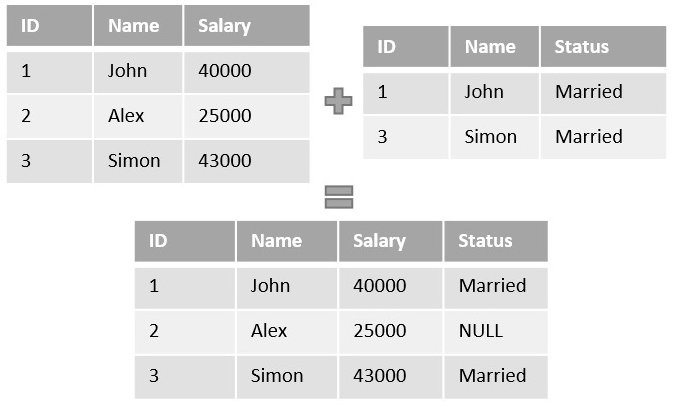
 - Right join: mantém os dados da tabela a direita e trás as ocorrências da tabela a esquerda, encontradas por meio da chave de ligação.

 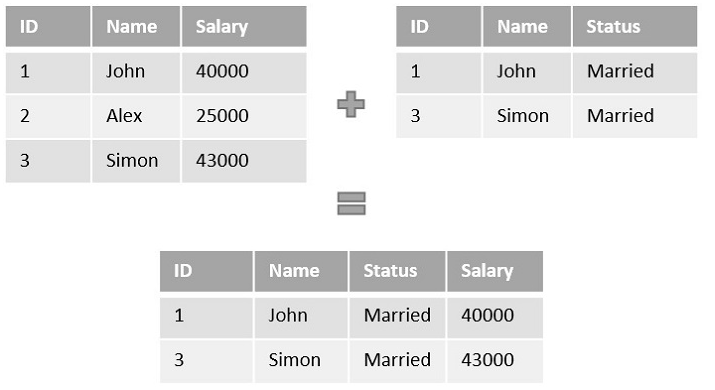

 - Inner join: faz um interseção entre as tabelas, manténdo apenas os registros correspondentes às chaves encontradas em ambas as tabelas.

 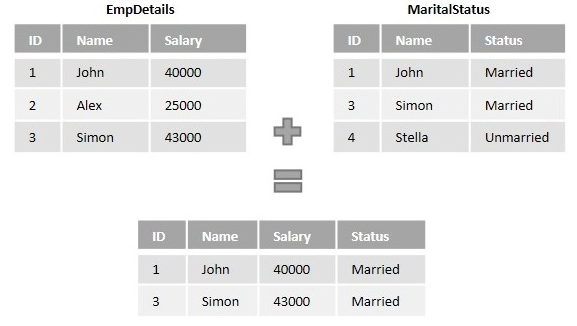

 - Outer join: une as duas tabelas, mesmo os registros não correspondentes entre chaves.

*fonte das imagens*: https://www.tutorialspoint.com/sql/sql-leftjoin-vs-rightjoin.htm
<br><br>
Em nosso exemplo, estamos usando um dataframe que registra ocorrências de acidentes aéreos, mas não temos o tipo da aeronave, tipo e qual a recomendação. Essas informações estão em tabelas auxiliares. Por meio das operações de join, podemos trazer essas informações para a nossa tabela de ocorrência.



In [ ]:
df_aeronave = pd.read_csv('/content/Bases de dados/aeronave.csv', sep=';', encoding='latin_1')
df_aeronave.head()

,codigo_ocorrencia2,aeronave_matricula,aeronave_operador_categoria,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,...,aeronave_pais_fabricante,aeronave_pais_registro,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total
0,83097,PRHDB,***,HELICÓPTERO,ROBINSON HELICOPTER,R44,R44,PISTÃO,MONOMOTOR,1088,...,BRASIL,BRASIL,HELICÓPTERO,PARTICULAR,CAMPO DE MARTE - SP,MAROUM,CRUZEIRO,***,SUBSTANCIAL,4
1,83085,PTEEK,***,AVIÃO,EMBRAER,EMB-810C,PA34,PISTÃO,BIMOTOR,2073,...,BRASIL,BRASIL,AVIÃO,TÁXI AÉREO,FAZENDA ÁGUA LIMPA,PLÁCIDO DE CASTRO,TÁXI,NÃO REGULAR,LEVE,0
2,83074,PSAEN,***,AVIÃO,EMBRAER,ERJ 190-400,E295,JATO,BIMOTOR,61200,...,BRASIL,BRASIL,AVIÃO,REGULAR,VIRACOPOS,TANCREDO NEVES,INDETERMINADA,REGULAR,NENHUM,0
3,83063,PRGZW,***,AVIÃO,BOEING COMPANY,737-86N,B738,NaN,BIMOTOR,79015,...,BRASIL,BRASIL,AVIÃO,REGULAR,GOVERNADOR ANDRÉ FRANCO MONTORO,PRESIDENTE JUSCELINO KUBITSCHEK,POUSO,REGULAR,NENHUM,0
4,83051,PRPDP,***,***,ATR - GIE AVIONS DE TRANSPORT RÉGIONAL,ATR-42-500,AT45,TURBOÉLICE,BIMOTOR,18600,...,BRASIL,BRASIL,***,REGULAR,PORTO URUCU,CARAUARI,TÁXI,REGULAR,NENHUM,0


In [ ]:
df_aeronave.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9926 entries, 0 to 9925
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   codigo_ocorrencia2           9926 non-null   int64  
 1   aeronave_matricula           9926 non-null   object 
 2   aeronave_operador_categoria  9926 non-null   object 
 3   aeronave_tipo_veiculo        9926 non-null   object 
 4   aeronave_fabricante          9925 non-null   object 
 5   aeronave_modelo              9924 non-null   object 
 6   aeronave_tipo_icao           9925 non-null   object 
 7   aeronave_motor_tipo          9813 non-null   object 
 8   aeronave_motor_quantidade    9926 non-null   object 
 9   aeronave_pmd                 9926 non-null   int64  
 10  aeronave_pmd_categoria       9926 non-null   int64  
 11  aeronave_assentos            9472 non-null   float64
 12  aeronave_ano_fabricacao      9623 non-null   float64
 13  aeronave_pais_fabr

In [ ]:
df_aeronave.codigo_ocorrencia2.value_counts().value_counts()

1    9721
2      96
3       3
4       1
Name: codigo_ocorrencia2, dtype: int64

Existem registros aparentemente duplicados.<br>
Para realizarmos o join, não faremos um tratamento dos dados, pois não é o objetivo agora. Vamos eliminar os registros duplicados do nosso dataframe para seguir com o exemplo do join.

In [ ]:
# Obtém os códigos duplicados
registros_duplicados = pd.DataFrame(df_aeronave['codigo_ocorrencia2'].value_counts())

# Máscara para filtrar o dataframe
mascara_codigo_aeronave = df_aeronave['codigo_ocorrencia2'].isin(registros_duplicados[registros_duplicados['codigo_ocorrencia2'] > 1].index)

# Verificando os registros
df_aeronave[mascara_codigo_aeronave].sort_values(by='codigo_ocorrencia2').head()


,codigo_ocorrencia2,aeronave_matricula,aeronave_operador_categoria,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,...,aeronave_pais_fabricante,aeronave_pais_registro,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total
9336,36326,PTMFJ,REGULAR,AVIÃO,AEROSPATIALE AND ALENIA,ATR-42-320,AT43,TURBOÉLICE,BIMOTOR,16700,...,BRASIL,BRASIL,AVIÃO,REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,POUSO,REGULAR,NENHUM,0
9335,36326,PTLJK,TÁXI AÉREO,AVIÃO,LEARJET,35A,LJ35,JATO,BIMOTOR,8301,...,BRASIL,BRASIL,AVIÃO,TÁXI AÉREO,FORA DE AERODROMO,FORA DE AERODROMO,DECOLAGEM,TÁXI AÉREO,NENHUM,0
9022,38419,PRSJE,***,AVIÃO,HAWKER BEECHCRAFT,C90GTI,BE9L,TURBOÉLICE,BIMOTOR,4581,...,BRASIL,BRASIL,AVIÃO,PARTICULAR,FORA DE AERODROMO,FORA DE AERODROMO,ESTACIONAMENTO,PRIVADA,***,0
9020,38419,N413HB,***,AVIÃO,HAWKER BEECHCRAFT,HAWKER 4000,***,JATO,BIMOTOR,17800,...,ESTADOS UNIDOS,ESTADOS UNIDOS,AVIÃO,PARTICULAR,FORA DE AERODROMO,FORA DE AERODROMO,PARTIDA DO MOTOR,PRIVADA,LEVE,0
9023,38419,PTWVG,***,AVIÃO,RAYTHEON AIRCRAFT,HAWKER 800XP,H25B,JATO,BIMOTOR,12701,...,BRASIL,BRASIL,AVIÃO,TÁXI AÉREO,FORA DE AERODROMO,FORA DE AERODROMO,ESTACIONAMENTO,TÁXI AÉREO,***,0


Para cada aeronave envolvida no ocorrido, ele registra uma linha. Vamos eliminá-las para seguir com o nosso exemplo.

In [ ]:
index_duplicados = df_aeronave[mascara_codigo_aeronave].index
df_aeronave = df_aeronave.drop(index_duplicados)

Vamos trazer o tipo da aeronave para a tabela de ocorrências.<br>
As operações de join podem ser feitas usando o método [merge](https://pandas.pydata.org/docs/reference/api/pandas.merge.html).

In [ ]:
df_tratado = pd.merge(df_tratado, df_aeronave[['codigo_ocorrencia2', 'aeronave_tipo_veiculo']], how='left', on=['codigo_ocorrencia2', 'codigo_ocorrencia2'])
df_tratado.head()

,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,codigo_ocorrencia4,classificacao,latitude,longitude,cidade,uf,...,aeronave_pais_registro,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total,aeronave_tipo_veiculo_y
0,83097,83097,83097,83097,83097,ACIDENTE,-2.352.777.777.777,-4.563.944.444.444,PARAIBUNA,SP,...,BRASIL,HELICÓPTERO,PARTICULAR,CAMPO DE MARTE - SP,MAROUM,CRUZEIRO,***,SUBSTANCIAL,4.0,HELICÓPTERO
1,83085,83085,83085,83085,83085,INCIDENTE,-9.868.333.333.333,-6.789.805.555.555,RIO BRANCO,AC,...,BRASIL,AVIÃO,TÁXI AÉREO,FAZENDA ÁGUA LIMPA,PLÁCIDO DE CASTRO,TÁXI,NÃO REGULAR,LEVE,0.0,AVIÃO
2,83074,83074,83074,83074,83074,INCIDENTE,-1.962.444.444.444,-4.397.194.444.444,BELO HORIZONTE,MG,...,BRASIL,AVIÃO,REGULAR,VIRACOPOS,TANCREDO NEVES,INDETERMINADA,REGULAR,NENHUM,0.0,AVIÃO
3,83063,83063,83063,83063,83063,INCIDENTE,-1.587.111.111.111,-4.791.861.111.111,BRASÍLIA,DF,...,BRASIL,AVIÃO,REGULAR,GOVERNADOR ANDRÉ FRANCO MONTORO,PRESIDENTE JUSCELINO KUBITSCHEK,POUSO,REGULAR,NENHUM,0.0,AVIÃO
4,83051,83051,83051,83051,83051,INCIDENTE,-4.871.388.888.888,-668.975,CARAUARI,AM,...,BRASIL,***,REGULAR,PORTO URUCU,CARAUARI,TÁXI,REGULAR,NENHUM,0.0,***


Agora, nosso dataframe de ocorrências contém a informação do tipo da aeronave envolvida.